# Sentiment Analysis
https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data

In this section, we will analyze the sentiment of the public reviews for different foods purchased via Amazon. We will use the TextBlob sentiment analyzer to do so.

The dataset can be downloaded from this Kaggle link.

As a first step, we need to import the dataset. We will only import the first 20,000 records due to memory constraints. You can import more records if you want. The following script imports the dataset:

In [1]:
import numpy as np
import pandas as pd

reviews_datasets = pd.read_csv(r'./Reviews.csv')
# reviews_datasets = reviews_datasets.head(20000)
# reviews_datasets.dropna()

reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
reviews_datasets['Text'][2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

From the output, you can see that the text review about the food is contained by the Text column. The score column contains ratings of the user for the particular product with 1 being the lowest and 5 being the highest rating.

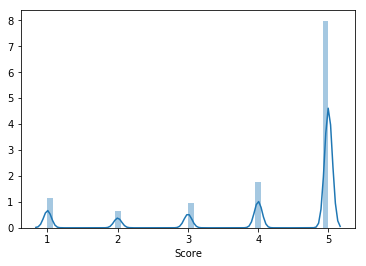

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(reviews_datasets['Score'])

You can see that most of the ratings are highly positive i.e. 5. Let's plot the bar plot for the ratings to have a better look at the number of records for each rating.

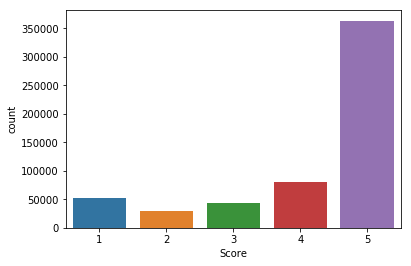

In [8]:
sns.countplot(x='Score', data=reviews_datasets)

The output shows that more than half of reviews have 5-star ratings.
Let's randomly select a review and find its polarity using TextBlob. Let's take a look at review number 350.

In [9]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

It looks like the review is positive. Let's verify this using the TextBlob library. To find the sentiment, we have to use the sentiment attribute of the TextBlog object. The sentiment object returns a tuple that contains polarity and subjectivity of the review.

The value of polarity can be between -1 and 1 where the reviews with negative polarities have negative sentiments while the reviews with positive polarities have positive sentiments.

The subjectivity value can be between 0 and 1. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

Let's find the sentiment of the 350th review.

In [10]:
from textblob import TextBlob

text_blob_object = TextBlob(reviews_datasets['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.39666666666666667, subjectivity=0.6616666666666667)


The output shows that the review is positive with a high subjectivity.
Let's now add a column for sentiment polarity in our dataset. Execute the following script:

In [11]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

reviews_datasets['Sentiment_Polarity'] = reviews_datasets['Text'].apply(find_pol)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


Now let's see the distribution of polarity in our dataset. Execute the following script:

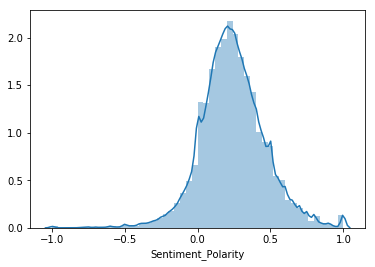

In [12]:
sns.distplot(reviews_datasets['Sentiment_Polarity'])

It is evident from the figure above that most of the reviews are positive and have polarity between 0 and 0.5. This is natural since most of the reviews in the dataset have 5-star ratings.

Let's now plot the average polarity for each score rating.

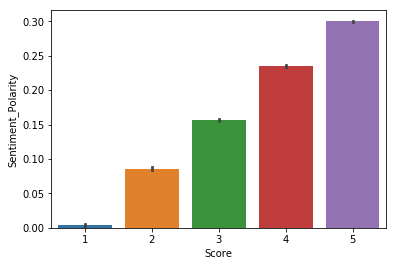

In [13]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=reviews_datasets)

The output clearly shows that the reviews with high rating scores have high positive polarities.

Let's now see some of the most negative reviews i.e. the reviews with a polarity value of -1.
## Most Negative

In [24]:
most_negative = reviews_datasets[reviews_datasets.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [ ]:
reviews_datasets['Text'][545]

## Most Positive

In [25]:
most_positive = reviews_datasets[reviews_datasets.Sentiment_Polarity == 1].Text[1:6]
print(most_positive)

223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
1115    Who doesn't like vegetables that are portable ...
Name: Text, dtype: object


In [ ]:
reviews_datasets['Text'][106]

You can see that though the review was not very positive, it has been assigned a polarity of 1 due to the presence of words like excellent and reputation. It is important to know that sentiment analyzer is not 100% error-proof and might predict wrong sentiment in a few cases, such as the one we just saw.

Let's now see review number 223 which also has been marked as positive.

In [ ]:
reviews_datasets['Text'][223]